# Customer Segmentation
In this guided project, we’ll play the role of a data scientist working for a credit card company. The idea of the project is similar to what we've done during the course, but now we're using a different dataset with more variables. The dataset contains information about the company’s clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

Luckily, the data engineering team has already cleaned most of the data so we can focus on building the best possible model to segment the data. Also, in a planning meeting with the Data Science coordinator, it was decided that we should use the K-means algorithm to segment the data.

The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.

In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

    - Analyze the dataset;
    - Prepare the data for modeling;
    - Find an appropriate number of clusters;
    - Segment the data;
    - Interpret and explain the results.

Here's the data dictionary:

| Column | Value Type | Description |
|-------|------------|-------------|
|`customer_id` | | unique identifier for each customer.
- age: customer age in years.
- gender: customer gender (M or F).
- dependent_count: number of dependents of each customer.
- education_level: level of education ("High School", "Graduate", etc.).
- marital_status: marital status ("Single", "Married", etc.).
- estimated_income: the estimated income for the customer projected by the data science team.
- months_on_book: time as a customer in months.
- total_relationship_count: number of times the customer contacted the company.
- months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
- credit_limit: customer's credit limit.
- total_trans_amount: the overall amount of money spent on the card by the customer.
- total_trans_count: the overall number of times the customer used the card.
- avg_utilization_ratio: daily average utilization ratio.

### Instructions
- Import pandas, numpy, matplotlib, seaborn, and the KMeans() and StandardScaler() classes from scikit-learn.
- Read the 'customer_segmentation.csv' into a pandas DataFrame.
- Familiarize ourselves with the dataset. Answer questions such as:
- How big is the dataset? How many columns does it have? Do we see any particular column that doesn't use the analysis?
- What's the type of data contained in each column? Are there many categorical variables? How are we dealing with them?
- Are there any missing values?
- Look at the correlation between the columns and explain what we see.
- Plot the distribution of each numeric column and comment on the results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

(10127, 14) 



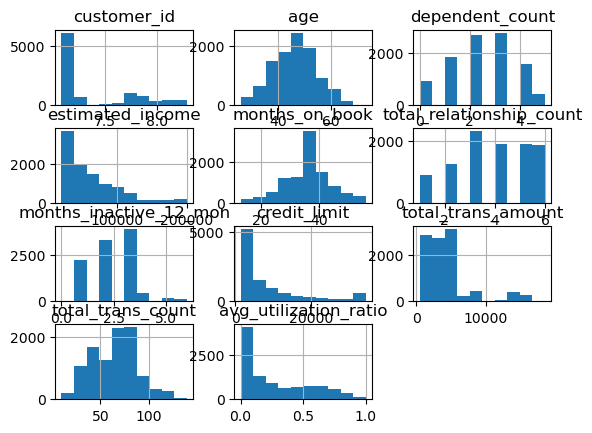

In [13]:
df = pd.read_csv("customer_segmentation.csv")

print(df.shape, "\n")
df.hist()
plt.show()

## Feature Engineering

Let's start dealing with the categorical columns. There are three of them: gender, education level, and marital status.

First, let's check on the gender and education_level columns.

The gender column contains only 2 unique values, "M" and "F", which means it's possible to replace all the rows with 1 and 0.

The education_level column contains 6 unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order.

But before we do the modifications, it's important to create a copy of the original DataFrame. We'll make all the modifications in the copy and leave the original DataFrame untouched so we can use it to analyze the results later.

### Instructions
1. Create a copy of the original DataFrame. Call it customers_modif, for instance.

2. Replace the values in the gender column with 1 for "M" and 0 for "F". Use the map() or replace() methods, a lambda function with apply(), or even the numpy.where() function to perform this task.

3. Replace the values in the education_level column in the order below. Choose how to execute this replacement.
    - Uneducated - 0
    - High School - 1
    - College - 2
    - Graduate - 3
    - Post-Graduate - 4
    - Doctorate - 5

In [18]:
df_mod = df.copy()

## Education Level
education_map = {
    "Uneducated": 0,
    "High School": 1,
    "College": 2,
    "Graduate": 3,
    "Post-Graduate": 4,
    "Doctorate": 5
}

df_mod["education_level"] = df_mod["education_level"].map(education_map) 

## Gender
gender_map = {
    "M": 0,
    "F": 1
}

df_mod["gender"] = df_mod["gender"].map(gender_map) 


print(df_mod["education_level"].value_counts(), "\n")
print(df_mod["gender"].value_counts())

education_level
3    3685
1    2351
0    1755
2    1192
4     616
5     528
Name: count, dtype: int64 

gender
1    5358
0    4769
Name: count, dtype: int64


## Feature Engineering - Part 2

Now, let's deal with the marital_status columns. This column contains these unique values:

    - Single
    - Married
    - Divorced
    - Unknown

Unfortunately, we can't do the same for this marital_status column as for the last categorical column. As we can see, unlike the education_level column, there is no level of magnitude between "Single", "Married" or "Divorced", for example. We can't say that any of them is higher or better than the others, which means we can't rank these categories objectively.

Therefore, we'll use one-hot-encoding to create dummy variables from this column.

### Instructions
1. Use the pandas.get_dummies() function to create a dataframe containing dummy variables for the unique values in the marital_status.

2. Combine the new DataFrame with the original.

3. Drop the original marital_status column.

In [22]:
mar_status_dummies = df_mod["marital_status"].str.get_dummies()
df_mod = df_mod.drop("marital_status", axis = 1)
df_mod = pd.concat([df_mod, mar_status_dummies], axis = 1)

print(df_mod.head())


   customer_id  age  gender  dependent_count  education_level  \
0    768805383   45       0                3                1   
1    818770008   49       1                5                3   
2    713982108   51       0                3                3   
3    769911858   40       1                4                1   
4    709106358   40       0                3                0   

   estimated_income  months_on_book  total_relationship_count  \
0             69000              39                         5   
1             24000              44                         6   
2             93000              36                         4   
3             37000              34                         3   
4             65000              21                         5   

   months_inactive_12_mon  credit_limit  ...  total_trans_count  \
0                       1       12691.0  ...                 42   
1                       1        8256.0  ...                 33   
2                

## Scaling the Data

Note that we have different scaled data across the DataFrame. The estimated_income, for instance, contains numbers in the range of dozens and hundreds of thousands, while the dependent_count column contains numbers from 1 to 5.

At this point of the project we need to transform the data so it's all on the same scale.

### Instructions
1. Create a new DataFrame without the column customer_id.
2. Instantiate an object from the scikit-learn's StandardScaler() class and fit the new DataFrame.
3. Use the transform method to scale the data. Assign it to a different variable and print it.
4. As the outcome of the scaler is an array, we can transform it back to a DataFrame using pd.DataFrame().

In [25]:
# df_mod = df_mod.drop("customer_id", axis = 1)

scaler = StandardScaler()
scaler.fit(df_mod)

df_scaled = pd.DataFrame(scaler.transform(df_mod))

print(df_scaled)

             0         1         2         3         4         5         6   \
0     -0.165406 -1.059956  0.503368 -0.752211  0.175810  0.384621  0.763943   
1      0.333570  0.943436  2.043199  0.662787 -0.967166  1.010715  1.407306   
2      0.583058 -1.059956  0.503368  0.662787  0.785397  0.008965  0.120579   
3     -0.789126  0.943436  1.273283 -0.752211 -0.636973 -0.241473 -0.522785   
4     -0.789126 -1.059956  0.503368 -1.459710  0.074212 -1.869317  0.763943   
...         ...       ...       ...       ...       ...       ...       ...   
10122  0.458314 -1.059956 -0.266547  0.662787 -0.281380  0.509840 -0.522785   
10123 -0.664382 -1.059956 -0.266547  0.662787 -0.560775 -1.368442  0.120579   
10124 -0.290150  0.943436 -1.036462 -0.752211 -0.738571  0.008965  0.763943   
10125 -2.036565 -1.059956 -0.266547  0.662787 -0.382978  0.008965  0.120579   
10126 -0.414894  0.943436 -0.266547  0.662787 -0.662372 -1.368442  1.407306   

             7         8         9         10      

## Choosing K
Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

### Instructions
1. Create an empty list to store the inertia from every model.
2. Use a for loop to the following process for different numbers of K. Loop in a range from 1 to 10, for example.
3. For each K in the loop:
- Instantiate a Kmeans object setting n_clusters=k.
- Use fit_predict() to create clusters.
- Append the inertia_ attribute of the model to the empty list.
4. Use the list to plot the elbow curve. Decide how many clusters to use and explain this decision.
5. Instantiate a new Kmeans object, but this time use the decided number of clusters as K.
6. fit_predict the data and print the outcome.

In [30]:
model_inertias = []

for k in range(1, 10):

    model = KMeans(n_clusters = k)
    cluster = model.fit_predict(df_scaled)
    model_inertias.append(model.inertia_)
 
 
import pprint as pp
pp.pprint(model_inertias)

[202540.00000000003,
 168074.69852585925,
 143047.15174463036,
 121165.14629203938,
 114352.48108387324,
 106521.64646751594,
 105273.40158775673,
 96435.78443897874,
 95139.16823222394]


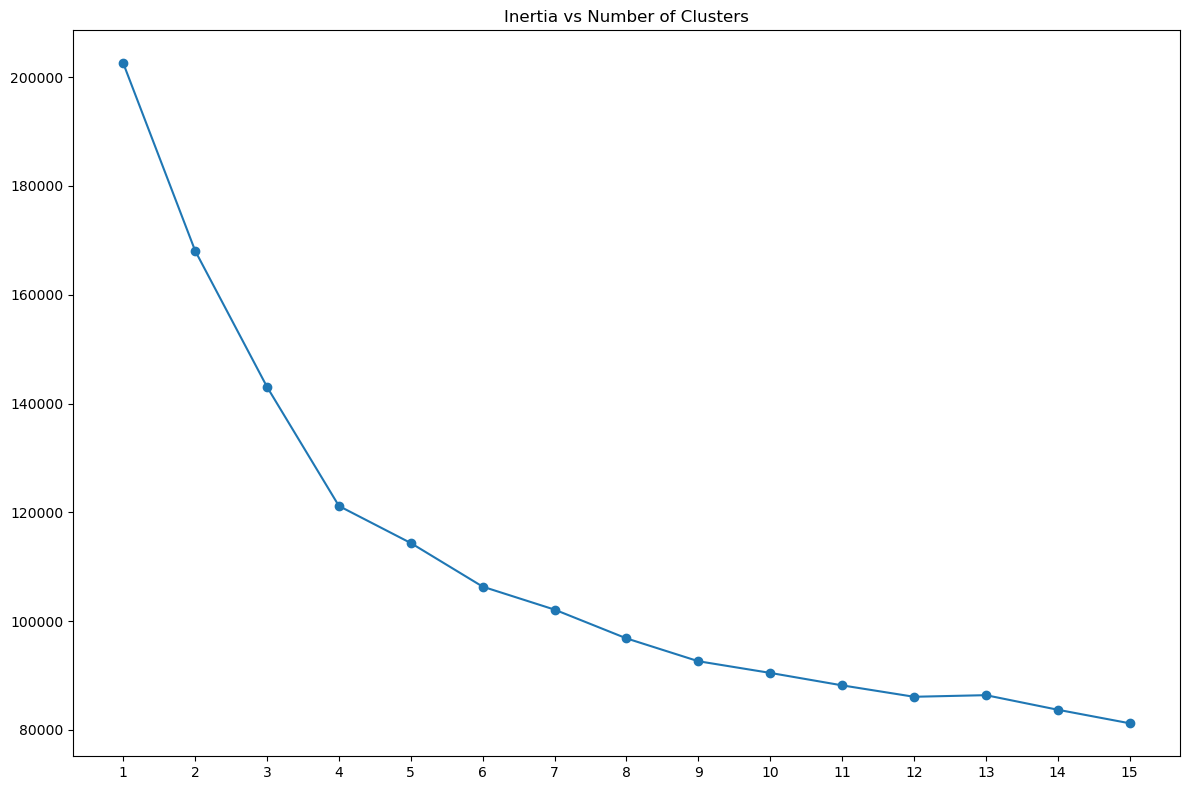

[202540.0, 168074.69852585922, 143047.15174463036, 121165.14629203937, 114352.51086032345, 106335.1834513017, 102115.0896195549, 96827.43092914757, 92627.37579928273, 90481.44656417228, 88192.57324736737, 86094.91729079993, 86390.79338627851, 83709.84688918763, 81222.47286212612]


In [32]:
def plot_elbow_curve(df, max_clusters = 15):
    
    inertias = []

    for k in range(1, max_clusters + 1):
        model = KMeans(n_clusters = k)
        cluster = model.fit_predict(df)
        inertias.append(model.inertia_)
        
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, max_clusters + 1), inertias, marker = 'o')
    plt.xticks(ticks = range(1, max_clusters + 1), labels=range(1, max_clusters + 1))
    plt.title('Inertia vs Number of Clusters')

    plt.tight_layout()
    plt.show()
    
    return inertias

inertias = plot_elbow_curve(df_scaled)
print(inertias)

## Analyzing Results
All that's left now is to analyze the results. We need to see how the variables used in the clusterization differ from cluster to cluster in order better explain what each cluster represents.

We should note the most important characteristics of each cluster and how they can impact the business and marketing strategies for each type of customer.

### Instructions
1. Create a new column called CLUSTER in the original customers DataFrame. This column should contain the cluster assigned to each customer by the algorithm.
2. Group each numeric variable by the CLUSTER column and plot a bar chart. Analyze the clusters' characteristics regarding each variable. Explain the conclusions.
3. Create a scatter plot with different colors for each cluster of pairs of variables with a high correlation. Use seaborn.scatterplot() function with the hue parameter.
4. Use the [pandas.crosstab()] (https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) function to calculate the percentual distribution of each variable per cluster for the categorical columns. Use this data to plot a stacked bar chart.
5. Explain the conclusions about each cluster: What are their main characteristics? How do they differ from the others? Can we make a business suggestion for each cluster?

In [ ]:
model = KMeans(n_clusters = 5)
clusters = model.fit_predict(df_scaled)

customers['Cluster'] = clusters + 1

print(customers['Cluster'].value_counts())

## Next Steps
That's it for the guided steps. Here are some potential next steps:

- Perform the clusterization using different numbers of clusters. Are there any differences?

- Research other ways to find the best number of clusters and compare the results with the results from the elbow method.

- Use fewer variables in the clusterization and explain what changes this brings to the model.

You can find the solution to this project [here](https://github.com/dataquestio/solutions/blob/master/Mission745Solutions.ipynb). Curious to see what other students have done on this project? Head over to our Community to check them out. While you're there, share your own feedback! And, of course, we welcome you to share your own project and show off your hard work. Head over to our Community to share your finished Guided Project!

Congratulations on completing the project!